# More on Gradient Descent - Learning Rate


## Gradient Descent

We saw that Gradient descent algorithm’s main objective is to minimise the cost function. It is one of the best optimisation algorithms to minimise errors (difference of actual value and predicted value).

The goal is similar like the above operation that we did to find out a best fit of intercept line ‘y’ in the slope ‘m’. Using Gradient descent algorithm also, we will figure out a minimal cost function by applying various parameters for theta 0 and theta 1 and see the slope intercept until it reaches convergence.


<br/>
<div style='float: left;'><img src='../../../images/gradient_descent.png'></div>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Learning Rate

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.


### Cost Function

There are two parameters in our cost function we can control: m (weight) and b (bias). Since we need to consider the impact each one has on the final prediction, we need to use partial derivatives. We calculate the partial derivatives of the cost function with respect to each parameter and store the results in a gradient.

The cost function is given by:

$$ f(m,b) =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $$

The gradient Descent is given by :

$\begin{split}f'(m,b) =
   \begin{bmatrix}
     \frac{df}{dm}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
    \end{bmatrix}\end{split}$
    


In [46]:
import numpy as np
np.random.seed(1892371837)
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
def  cal_cost(theta,X,y):
   
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

 

Theta0:          3.886,
Theta1:          3.310
Final cost/MSE:  3629.914


## Solution

Just run the above code

## Optimizing the Learning Rate

In the above code, we have included lists to capture the number of iterations and the cost function of each iteration.

Next, we will plot the two to find out how it changes as per iterations.

Check how with small learning rates it takes long to converge to the solution whereas with with larger learning rates it is quicker.

A note of caution the actual learning rate for your problem would depend on the data and there is no general formula to set it right. However there are sophisticated optimization algorithms which start with a larger learning rates and then slowly reduce the learning rate as we approach the solution.

In the below plot, the cost function starts converging at around 65 iterations.  

1134410855

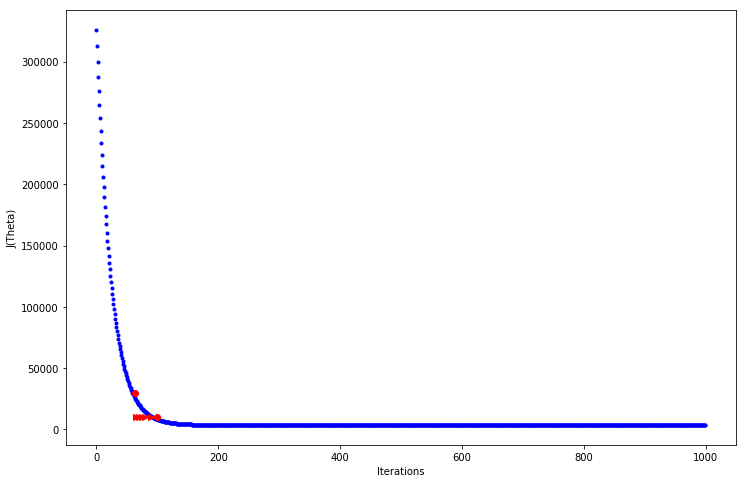

In [47]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')
ax.plot(63,30000, 'ro')  
ax.plot(100,10000, 'ro')  
ax.plot(90,10000, 'r>')  
ax.plot(80,10000, 'r>')  
ax.plot(75,10000, 'r>')  
ax.plot(70,10000, 'r>')  
ax.plot(65,10000, 'r>') 



### Solution

Just run the above code


### Finding the Optimal Learning Rate

In the above code, we have fixed the Learning rate (lr) as 0.01. While this is a good starting point,
we must try having a higher learning rate and lower learning rate. For a  very high learning rate the cost function may not converge at all. Then we must start a maximum learning rate at which the curve looks converging and then start decreasing the learning rate until it is optimum.

For a very low learning rate, the cost function might take a very long time to converge.

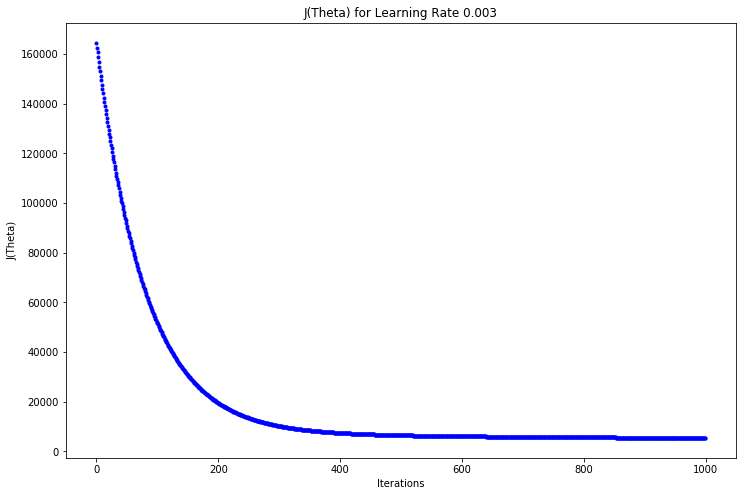

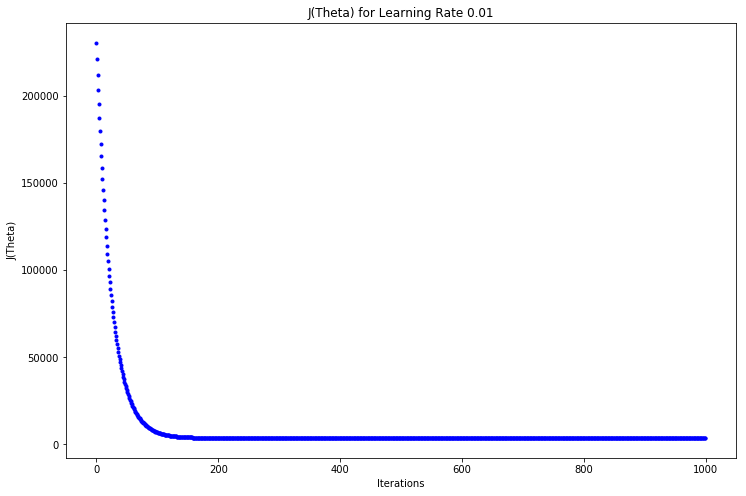

In [62]:
lr =[0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
n_iter = 1000

for l in lr:

    theta = np.random.randn(2,1)

    X_b = np.c_[np.ones((len(X),1)),X]
    theta,cost_history,theta_history = gradient_descent(X_b,y,theta,l,n_iter)

    fig,ax = plt.subplots(figsize=(12,8))

    ax.set_title('J(Theta) for Learning Rate ' + str(l))
    ax.set_ylabel('J(Theta)')
    ax.set_xlabel('Iterations')
    _=ax.plot(range(n_iter),cost_history,'b.')


### Solution

Just run the code